In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
california = fetch_california_housing()

In [3]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
print(california.data.shape)
print(california.target.shape)

(20640, 8)
(20640,)


In [6]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [12]:
import pandas as pd

california_df = pd.DataFrame(california.data,columns=california.feature_names)
california_df['MedHouseValue'] = pd.Series(california.target)
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [14]:
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<Axes: >

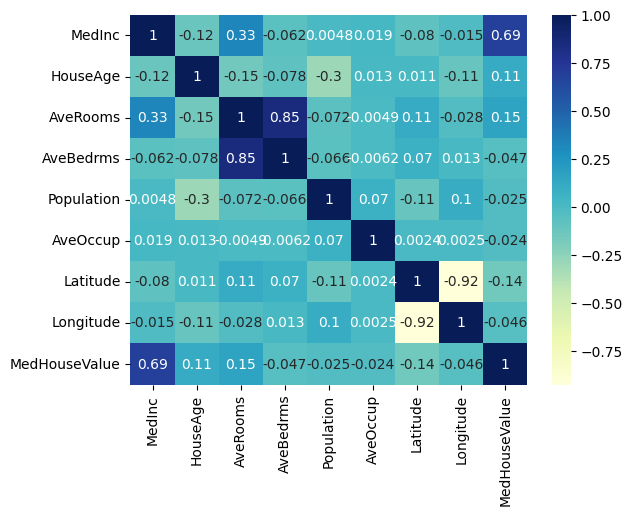

In [17]:
import matplotlib.pyplot as pltplt
import seaborn as sns
sns.heatmap(california_df.corr(), annot=True, cmap='YlGnBu')

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseValue'}>]], dtype=object)

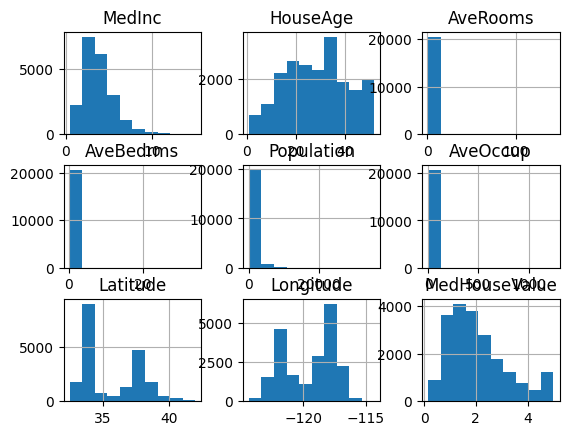

In [18]:
california_df.hist()

In [19]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target,test_size=0.3, random_state=11)
print(X_train.shape)
print(X_test.shape)

(14448, 8)
(6192, 8)


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
reg = LinearRegression()

In [32]:
reg.fit(X=X_train, y=y_train)

LinearRegression()

In [33]:
reg.fit(X_train, y_train)

LinearRegression()

In [43]:
reg.score(X_test, y_test)

0.5970513176335808

In [36]:
print(reg.intercept_)

-36.79039929080467


In [39]:
predicted = reg.predict(X_test)
expected = y_test

In [40]:
from sklearn import metrics
print(f'The R2 score: {metrics.r2_score(expected, predicted)}\n')
print(f'The MSE: {metrics.mean_squared_error(expected, predicted)}')

The R2 score: 0.5970513176335808

The MSE: 0.5372046278603445


In [45]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X=X_train, y=y_train)

RandomForestRegressor()

In [46]:
forest.score(X_test, y_test)

0.797841555822275

In [48]:
predicted = forest.predict(X_test)
expected = y_test
from sklearn import metrics
print(f'The R2 score: {metrics.r2_score(expected, predicted)}\n')
print(f'The MSE: {metrics.mean_squared_error(expected, predicted)}')

The R2 score: 0.797841555822275

The MSE: 0.2695143489129609


In [51]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(X=X_train, y=y_train)

DecisionTreeRegressor()

In [53]:
tree.score(X_test, y_test)

0.6093192924656375

In [54]:
predicted = tree.predict(X_test)
expected = y_test
from sklearn import metrics
print(f'The R2 score: {metrics.r2_score(expected, predicted)}\n')
print(f'The MSE: {metrics.mean_squared_error(expected, predicted)}')

The R2 score: 0.6093192924656375

The MSE: 0.5208491633988372
